## Numerical differentiation

In mathematics, function derivatives are often used to model changes in the the function variables. However, in practice the function may not be explicitly known, or the function may be represented by a set of data points. In these cases and others, it may be desirable to compute derivatives numerically rather than analytically.

### Finite Difference Approximating Derivatives

The derivative $f'(x)$ of the function $f(x)$ at the point $x=a$ is defined as 

$$
f'(a) = \lim\limits_{x \to a}\frac{f(x) - f(a)}{x-a}
$$

The derivative at $x=a$ is the slope at this point. In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal.

####  Forward difference 

The objective is to approximate the slope of the function at $x_j$ using the line that connects $(x_{j},f(x_j))$ and $(x_{j+1},f(x_{j+1}))$

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}
$$

####  Backward difference 

The objective is to approximate the slope of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_{j},f(x_j))$

$$
f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}
$$

####  Central difference 

The objective is to approximate the slope of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}
$$


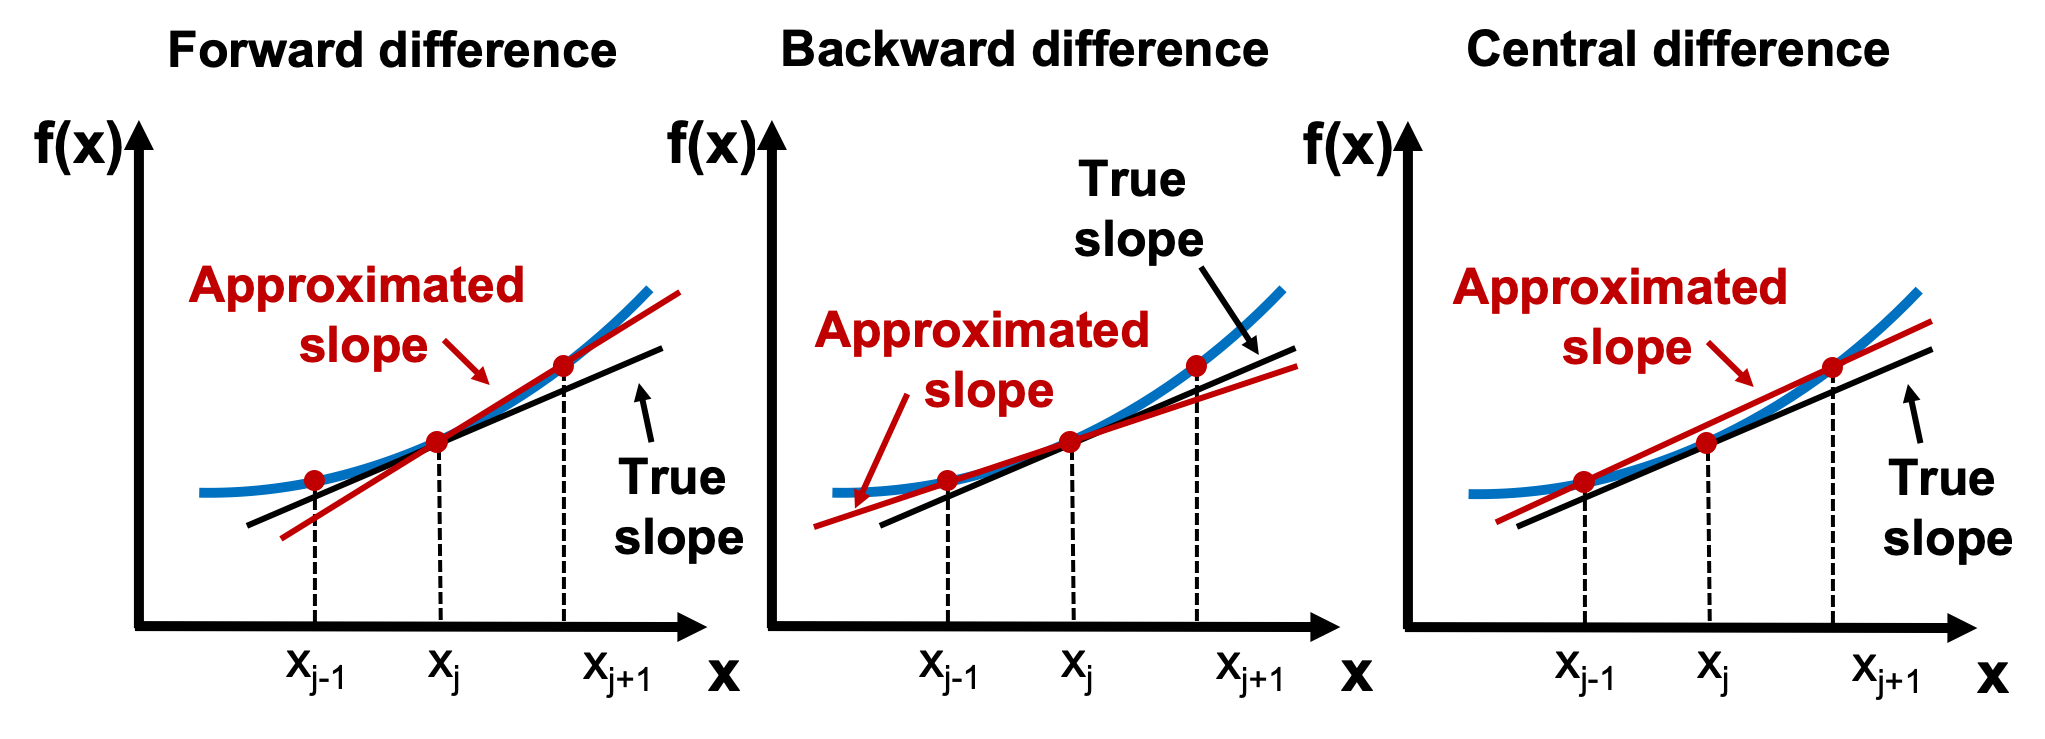

In [1]:
# Numerical Example

#compute the numerical difference of a function f(x) = cos(x)

import numpy as np
import matplotlib.pyplot as plt

In [58]:
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)

y_prime = -2*np.sin(2*x)

In [11]:
def forward_diff(x,y):
    
    num = y[1:]-y[:-1]
    den = x[1:]-x[:-1]
    
    return num/den

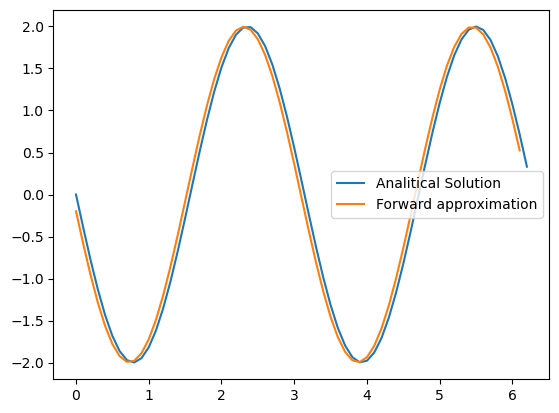

In [14]:
diff = forward_diff(x,y)
plt.plot(x,y_prime,label='Analitical Solution')
plt.plot(x[:-1],diff, label='Forward approximation')
plt.legend()
plt.show()

In [15]:
def backward_diff(x,y):
    
    num = y[:-1]-y[1:]
    den = x[:-1]-x[1:]
    
    return num/den

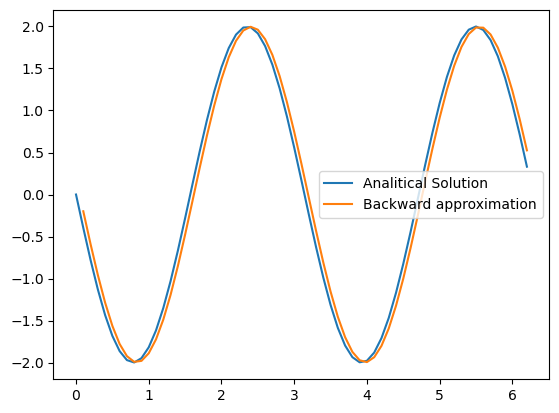

In [17]:
diff = backward_diff(x,y)
plt.plot(x,y_prime,label='Analitical Solution')
plt.plot(x[1:],diff, label='Backward approximation')
plt.legend()
plt.show()

In [56]:
#exercise -> Implement the algorithm to compute the central difference approximation
def central_diff(x,y):
    
    num = 
    den =
    
    return num/den


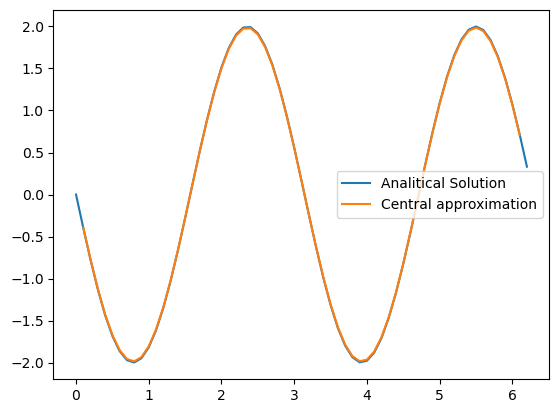

In [59]:
diff = central_diff(x,y)
plt.plot(x,y_prime,label='Analitical Solution')
plt.plot(x[1:-1],diff, label='Central approximation')
plt.legend()
plt.show()

#### Effect of step size 

The error of the numerical approximation is a function of the step size. As the step size gets closer to zero, the numerical approximation is closer to the analitical solution. 

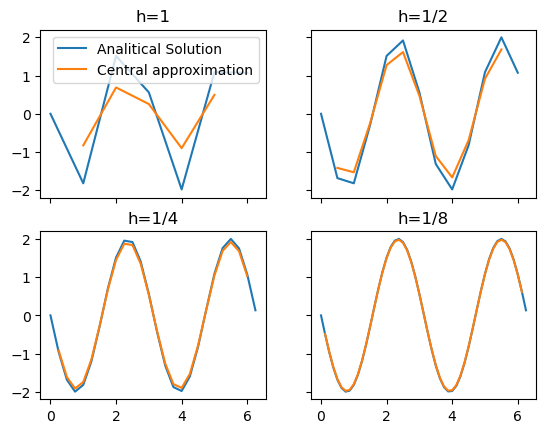

In [39]:
#Effect of step size 

fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

h = 1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)
y_prime = -2*np.sin(2*x)

diff = central_diff(x,y)
ax[0,0].plot(x,y_prime,label='Analitical Solution')
ax[0,0].plot(x[1:-1],diff, label='Central approximation')
ax[0,0].legend()
ax[0,0].set_title('h=1')

h = 1/2
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)
y_prime = -2*np.sin(2*x)

diff = central_diff(x,y)
ax[0,1].plot(x,y_prime,label='Analitical Solution')
ax[0,1].plot(x[1:-1],diff, label='Central approximation')
ax[0,1].set_title('h=1/2')

h = 1/4
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)
y_prime = -2*np.sin(2*x)

diff = central_diff(x,y)
ax[1,0].plot(x,y_prime,label='Analitical Solution')
ax[1,0].plot(x[1:-1],diff, label='Central approximation')
ax[1,0].set_title('h=1/4')

h = 1/8
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)
y_prime = -2*np.sin(2*x)

diff = central_diff(x,y)
ax[1,1].plot(x,y_prime,label='Analitical Solution')
ax[1,1].plot(x[1:-1],diff, label='Central approximation')
ax[1,1].set_title('h=1/8')

plt.show()

### Higher Order Derivatives

it is also possible to approximate second and higher order derivatives numerical ussing differences. 

For example, the second order derivative can be approximated by 
$$
f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}
$$

Here we assumed that the signal is sampled at a constant rate, and the the difference between two consecutive time points is $h$. The approximation error grows as $h^2$

In [40]:
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(2*x)

y_prime = -2*np.sin(2*x)
y_prime_prime = -4*np.cos(2*x)

In [50]:
#exercise -> Implement the algorithm to compute the central difference approximation
def second_order_diff(y,h):
    
    num = y[2:]-2*y[1:-1]+y[:-2]
    den = h*h
    
    return num/den


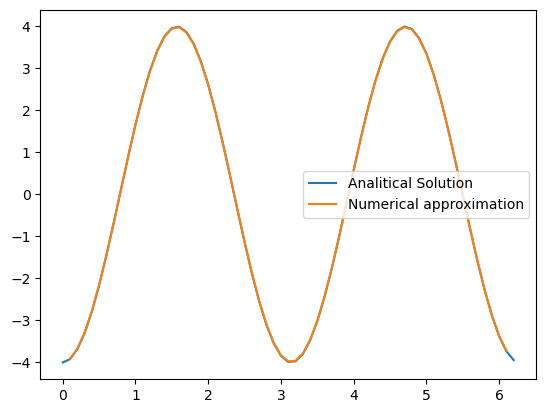

In [51]:
diff = second_order_diff(y,h)
plt.plot(x,y_prime_prime,label='Analitical Solution')
plt.plot(x[1:-1],diff, label='Numerical approximation')
plt.legend()
plt.show()

#### Effect of noise

Noise might severely affect numerical estimation of derivatives. 

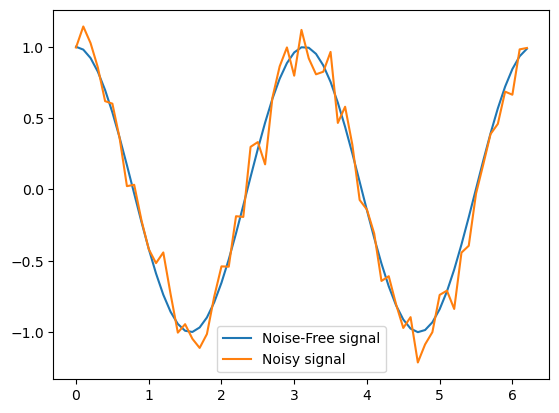

In [70]:
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function

y = np.cos(2*x) + 0.1*np.random.randn(x.size)

y_prime = -2*np.sin(2*x)
y_prime_prime = -4*np.cos(2*x) 
plt.plot(x,np.cos(2*x),  label='Noise-Free signal')
plt.plot(x,y, label='Noisy signal')
plt.legend()
plt.show()

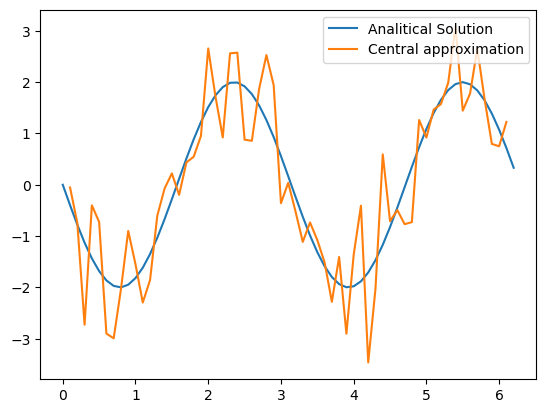

In [61]:
diff = central_diff(x,y)
plt.plot(x,y_prime,label='Analitical Solution')
plt.plot(x[1:-1],diff, label='Central approximation')
plt.legend()
plt.title('First Order Derivative')
plt.show()

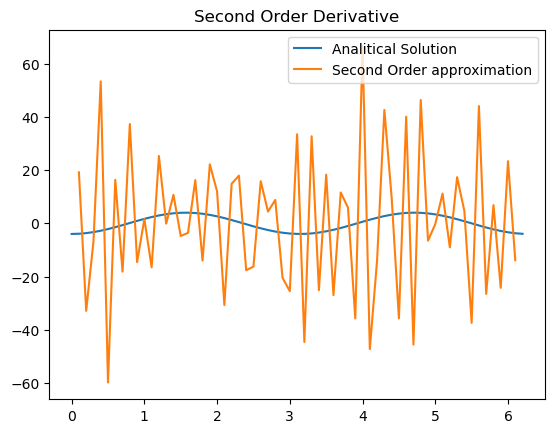

In [63]:
diff = second_order_diff(y,h)
plt.plot(x,y_prime_prime,label='Analitical Solution')
plt.plot(x[1:-1],diff, label='Second Order approximation')
plt.legend()
plt.title('Second Order Derivative')
plt.show()

In these cases, it is preferable to filter the signal first before applying the numerical approximation. To learn more about filter, you should take my Signal's class next spring. 